In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

## ```cyclists``` dataset

In [36]:
cyclists_df = pd.read_csv('../dataset/cyclists_outlier.csv')

In [37]:
print(cyclists_df.columns)

Index(['_url', 'name', 'birth_year', 'nationality', 'cyclist_experience',
       'cyclist_win', 'cyclist_win_ratio', 'avg_relative_position',
       'relative_position_std', 'min_relative_position',
       'avg_performance_vs_startlist', 'performance_entropy',
       'weighted_podiums', 'career_level', 'avg_position', 'cyclist_x',
       'best_position', 'cyclist_y', 'best_position_std', 'top_experience',
       'continent', 'top_cyclists'],
      dtype='object')


In [38]:
numeric_columns = cyclists_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['birth_year', 'cyclist_experience', 'cyclist_win', 'cyclist_win_ratio',
       'avg_relative_position', 'relative_position_std',
       'min_relative_position', 'avg_performance_vs_startlist',
       'performance_entropy', 'weighted_podiums', 'career_level',
       'avg_position', 'best_position', 'best_position_std'],
      dtype='object')


### **Clustering Preprocessing - Normalization**

Take only numerical columns 

In [ ]:
# Specifica le colonne da mantenere
columns_to_keep = ["avg_relative_position", "relative_position_std", "career_level"] 
"""columns_to_keep = ["performance_entropy", "career_level", "best_position_std", "avg_relative_position"]
"""# Crea un nuovo dataset con solo le colonne specificate
all_cyclists_df = cyclists_df
cyclists_df = cyclists_df[columns_to_keep]


Standardize cyclists_df by scaling each feature to have a mean of 0 and a standard deviation of 1.

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(cyclists_df)
cyclist_normalized_df = scaler.transform(cyclists_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(cyclists_df)), columns=cyclists_df.columns)



,avg_relative_position,relative_position_std,performance_entropy
0,0.456286,0.243635,5.246679
1,0.630686,0.205735,3.835542
2,0.557360,0.219011,4.996583
3,0.464642,0.238795,3.745187
4,0.589817,0.238517,5.853528
...,...,...,...
4140,0.510309,0.340690,2.821142
4141,0.637519,0.215697,3.198910
4142,0.697735,0.150866,2.463501
4143,0.413682,0.238513,4.551203


### **K-menas** of cyclists dataset 

### **Best k**

In [41]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(cyclists_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 1488.0393719750332
k: 3, SSE: 732.1197022682659
k: 4, SSE: 462.714574711464
k: 5, SSE: 316.301253135362
k: 6, SSE: 236.10831381461884
k: 7, SSE: 191.64363459514516
k: 8, SSE: 164.2297043173345
k: 9, SSE: 143.10011585344742
k: 10, SSE: 126.05014978166393
k: 15, SSE: 91.9909934216445
k: 20, SSE: 75.34743824661102


In [42]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(cyclists_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 1488.0393719750332
Separation 0.5348052357080844
Silhouette 0.598575567027395
for k = 3
SSE 732.1197022682659
Separation 0.5660640727752961
Silhouette 0.540862762739389
for k = 4
SSE 462.714574711464
Separation 0.607889132559176
Silhouette 0.49619361967845366
for k = 5
SSE 316.301253135362
Separation 0.6165221123245953
Silhouette 0.48090007184581296
for k = 6
SSE 236.10831381461884
Separation 0.6282707967552353
Silhouette 0.46542288087259853
for k = 7
SSE 191.64363459514516
Separation 0.6620837873716053
Silhouette 0.44321337124216714
for k = 8
SSE 164.2297043173345
Separation 0.7112384952830302
Silhouette 0.4192696320484864
for k = 9
SSE 143.10011585344742
Separation 0.7321404304746217
Silhouette 0.40336771331419663
for k = 10
SSE 126.05014978166393
Separation 0.7648543241669906
Silhouette 0.39372973804171457
for k = 15
SSE 91.9909934216445
Separation 0.9734752440101871
Silhouette 0.3165061518749999
for k = 20
SSE 75.34743824661102
Separation 1.0307750376935725
Silhouette

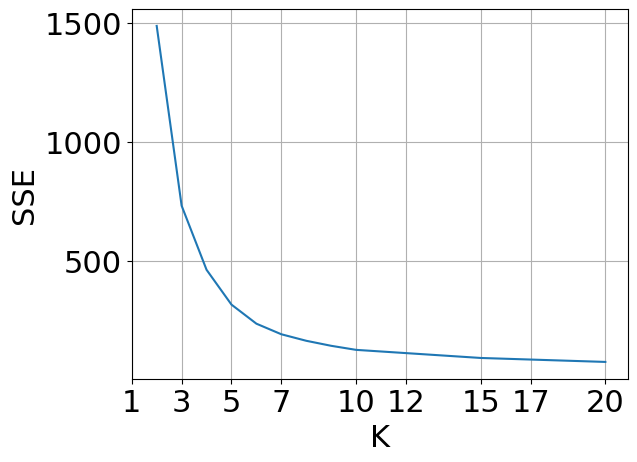

In [43]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


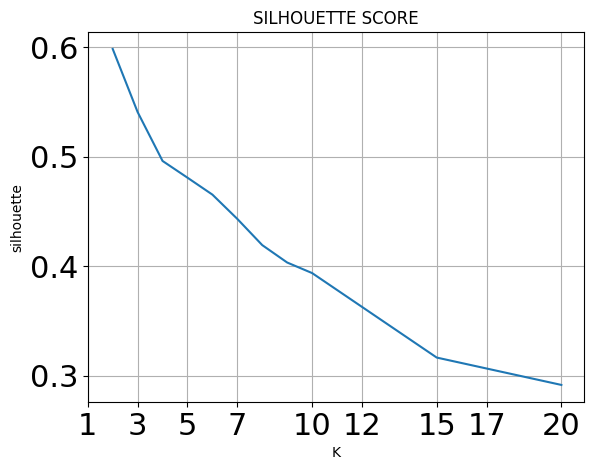

In [44]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

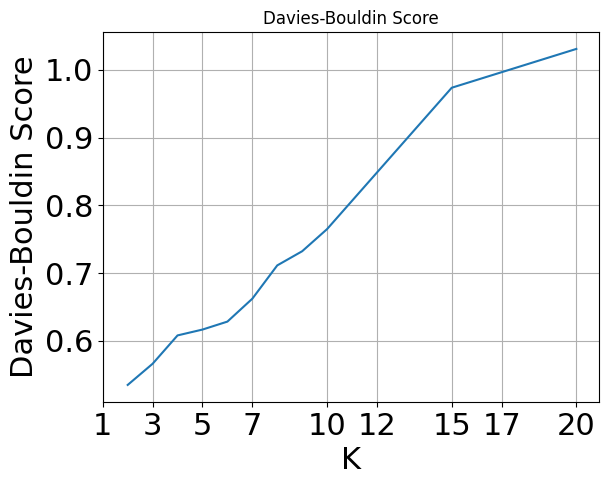

In [45]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (cyclists dataset)

In [46]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(cyclist_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [47]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1275, 1713, 1157]


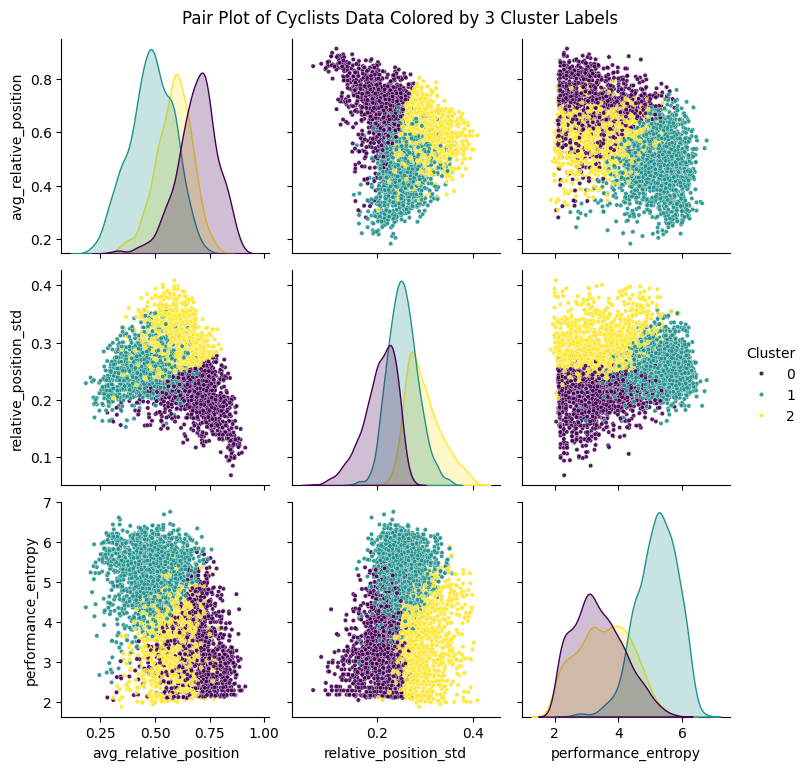

In [48]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

all_cyclists_df = all_cyclists_df.assign(Cluster=labels_series.values)

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(cyclists_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 0.9})
plt.suptitle(f'Pair Plot of Cyclists Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()



Based on the pair plot the culstering result better is chosen 

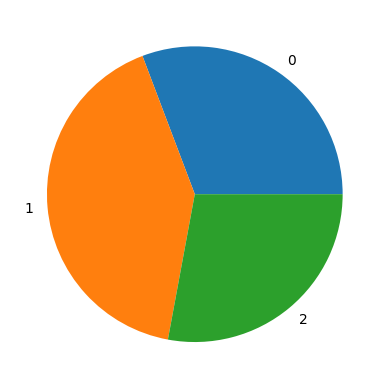

In [49]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on top cyclists column

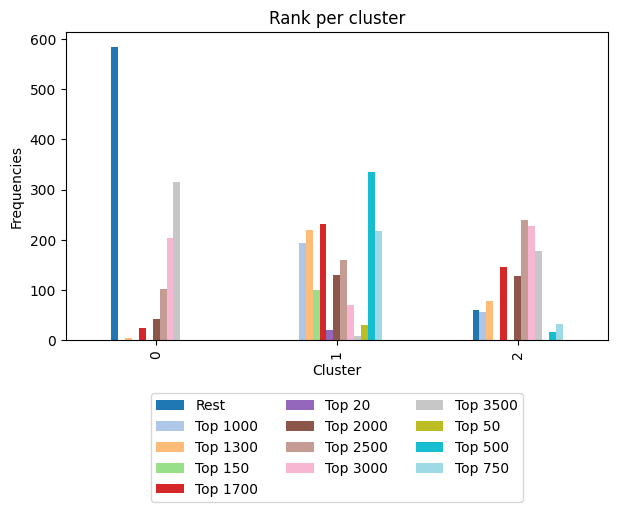

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


In [51]:
# Sort the cyclists_df DataFrame by the 'career_level' column in descending order
sorted_cyclists_df = all_cyclists_df.sort_values(by='career_level', ascending=False)
[1419, 2256, 554]
# Define the bins and labels
bins = [0, 554, 2810, len(sorted_cyclists_df)]
labels = ['Top 554', 'Top 2810', 'Rest']

# Create a new column 'career_level_category' based on the bins
sorted_cyclists_df['top_cyclists2'] = pd.cut(range(1, len(sorted_cyclists_df) + 1), bins=bins, labels=labels, right=False)

# Add the 'top_cyclists' column to the original cyclists_df
all_cyclists_df = all_cyclists_df.merge(sorted_cyclists_df[['_url', 'top_cyclists2']], on='_url', how='left')

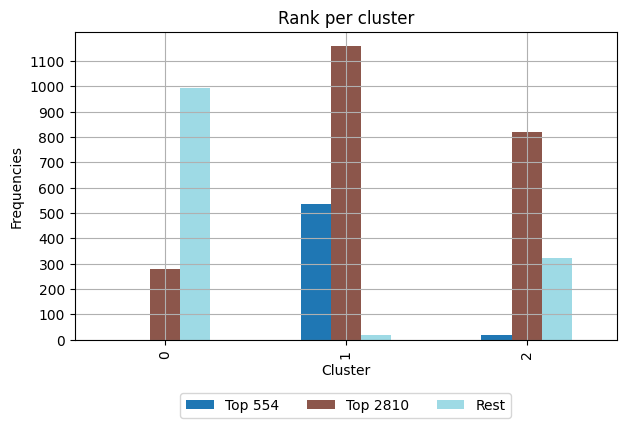

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_cyclists_df['top_cyclists2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Aggiungere più intervalli sull'asse y
ax.set_yticks(range(0, rank_xt_pct.values.max() + 1, 100))

# Aggiungere la griglia
ax.grid(True)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


#### Radar plot

0
1
2


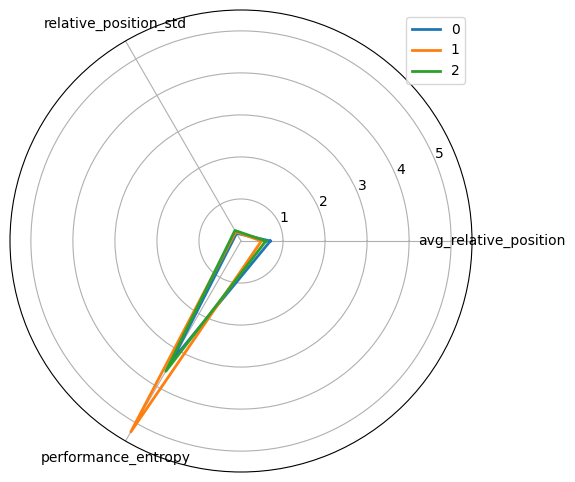

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(cyclists_df.columns)
plt.figure(figsize=(6, 6))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
     
    values = cyclists_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], cyclists_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------

## ```races``` dataset

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc
import os
import scipy.stats as stats
import pandas as pd
import plotly.express as px
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [55]:
races_df = pd.read_csv('../dataset/races_outlier.csv')

### **Clustering Preprocessing - Normalization**

In [56]:
# columns_preserve = ['startlist_quality', 'avg_cyclists_level', 'race_importance']     SIMONELLI
columns_preserve = ["climb_total", "length"]


all_races_df = races_df
# Create a new dataset with only the specified columns
races_df = races_df[columns_preserve]

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(races_df)
races_normalized_df = scaler.transform(races_df)

pandas.DataFrame(scaler.inverse_transform(scaler.transform(races_df)), columns=races_df.columns)



,climb_total,length
0,3.300,2.565
1,3.500,2.518
2,3.495,2.514
3,3.558,2.580
4,3.320,2.487
...,...,...
2520,4.120,1.812
2521,3.359,1.900
2522,3.741,1.534
2523,3.675,1.714


### **K-means** for reaces dataset

### **Best K**

In [58]:
k_grid = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

sse_list = list()

label_list = []
dict_kmeans = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(races_df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    #we save a list of see and labels for each k-means tried
    dict_kmeans[f'{k}_sse'] = sse
    dict_kmeans[f'{k}_labels'] = labels

    print(f'k: {k}, SSE: {sse}')

k: 2, SSE: 2369.61045231509
k: 3, SSE: 1291.2677942501255
k: 4, SSE: 876.1550894984284
k: 5, SSE: 641.9949727359258
k: 6, SSE: 522.1397885081927
k: 7, SSE: 458.19796827123525
k: 8, SSE: 403.6567110140219
k: 9, SSE: 369.324718815905
k: 10, SSE: 331.15786156233355
k: 15, SSE: 217.8539216140514
k: 20, SSE: 165.95614427165953


In [59]:
for k in k_grid:
    print(f'for k = {k}')
    
    print('SSE %s' % dict_kmeans[f'{k}_sse'])
    current_bouldin = metrics.davies_bouldin_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_bouldin_score'] = current_bouldin
    print('Separation %s' % current_bouldin)
    
    current_silhouette = silhouette_score(races_df, dict_kmeans[f'{k}_labels'])
    dict_kmeans[f'{k}_silhouette_score'] = current_silhouette
    print('Silhouette %s' % current_silhouette)

for k = 2
SSE 2369.61045231509
Separation 0.7411139056006565
Silhouette 0.4775070078169193
for k = 3
SSE 1291.2677942501255
Separation 0.6919548606331872
Silhouette 0.47830717462778616
for k = 4
SSE 876.1550894984284
Separation 0.6899211355759909
Silhouette 0.44454392931917047
for k = 5
SSE 641.9949727359258
Separation 0.7027872185131958
Silhouette 0.43418022422235925
for k = 6
SSE 522.1397885081927
Separation 0.7764708627948962
Silhouette 0.404229665581092
for k = 7
SSE 458.19796827123525
Separation 0.8419533620924627
Silhouette 0.3772743264120923
for k = 8
SSE 403.6567110140219
Separation 0.8300501147168395
Silhouette 0.3811368223679653
for k = 9
SSE 369.324718815905
Separation 0.8724257852925477
Silhouette 0.3628672205430859
for k = 10
SSE 331.15786156233355
Separation 0.8538130474914555
Silhouette 0.37520464643172313
for k = 15
SSE 217.8539216140514
Separation 0.8248069856572428
Silhouette 0.3599842074486082
for k = 20
SSE 165.95614427165953
Separation 0.8231932738562744
Silhouette

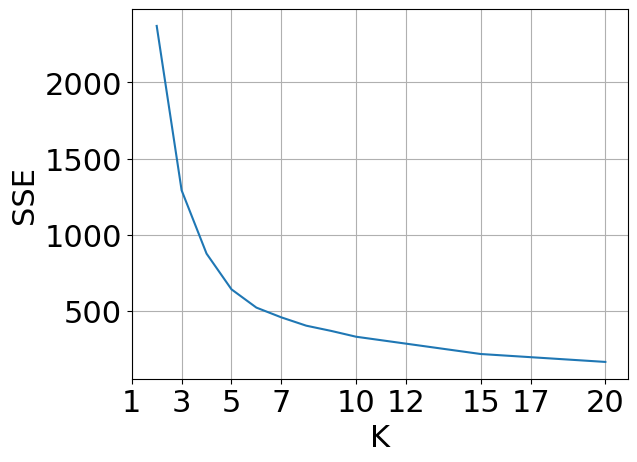

In [60]:
sse_list = [dict_kmeans[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()


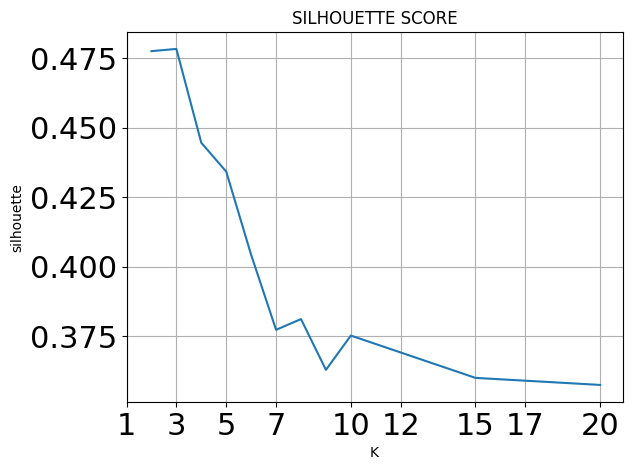

In [61]:
silhouette_list = [dict_kmeans[f'{k}_silhouette_score'] for k in k_grid]
plt.plot(k_grid, silhouette_list)
plt.ylabel('silhouette')
plt.xlabel('K')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('SILHOUETTE SCORE')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

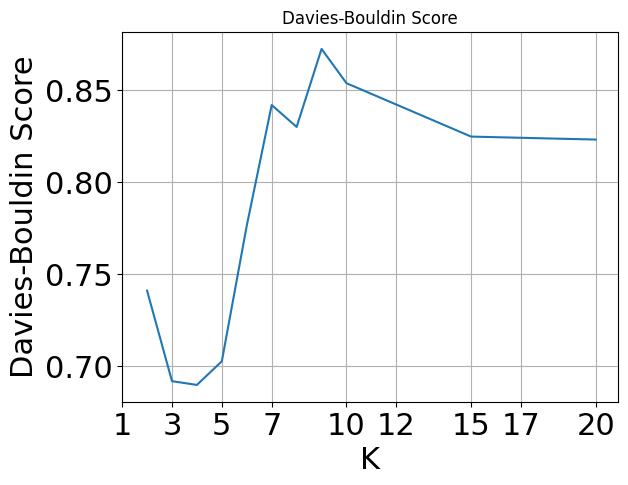

In [62]:
bouldin_list = [dict_kmeans[f'{k}_bouldin_score'] for k in k_grid]
plt.plot(k_grid, bouldin_list)
plt.ylabel('Davies-Bouldin Score', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.title('Davies-Bouldin Score')
plt.xticks([1, 3, 5, 7, 10, 12, 15, 17, 20])
plt.grid(True)
plt.show()

### **K-means resuslts** (races datastet)

In [63]:
#RETRAIN BEST K-MEANS
best_k = 3
best_kmeans = KMeans(n_clusters=best_k, random_state=0, max_iter=1000)
best_kmeans.fit(races_normalized_df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [64]:
# Calculate number of clusters for final kmeans
n_clusters = len(np.unique(best_kmeans.labels_))

# Calculate list of label occurrencies for each cluster
occ_list = []
for k in range(n_clusters):
    occ_list.append(np.count_nonzero(best_kmeans.labels_ == k))

print('cluster sizes:', occ_list)

cluster sizes: [1336, 320, 869]


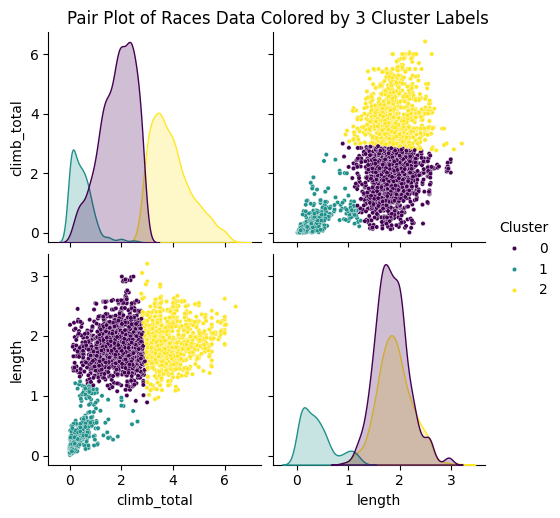

In [65]:
# convert lables to pandas Series
labels_series = pd.Series(best_kmeans.labels_, name='Cluster')

# Pair plot colored by cluster labels with smaller markers
sns.pairplot(races_df.assign(Cluster=labels_series), hue='Cluster', palette='viridis', markers='o', plot_kws={'s': 10, 'alpha': 1.0})
plt.suptitle(f'Pair Plot of Races Data Colored by {n_clusters} Cluster Labels', y=1.02)
plt.show()

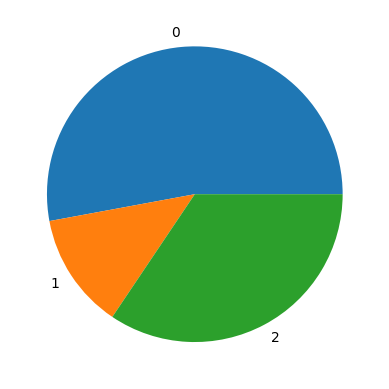

In [66]:
label= range(n_clusters)
plt.pie(occ_list, labels=label, colors=sns.color_palette(n_colors=n_clusters))
plt.show()

#### Characterization based on ```top_complex_races``` column

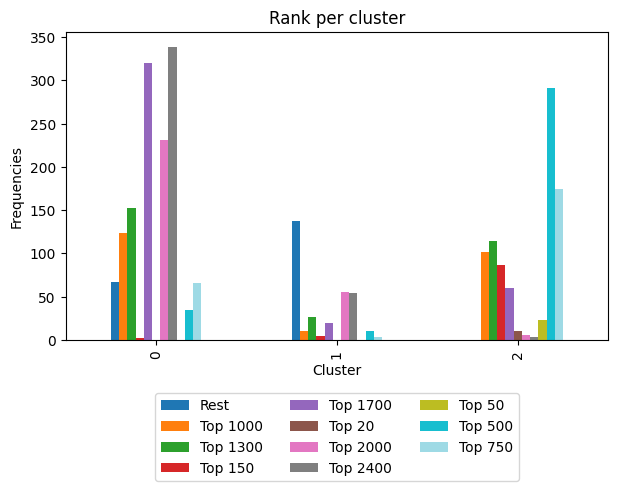

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(7, 4))

# Creare la tabella crosstab
rank_xt_pct = pd.crosstab(best_kmeans.labels_, all_races_df['top_complex_races_2'])

# Tracciare il grafico con colori distinti
rank_xt_pct.plot(
    kind='bar', 
    stacked=False, 
    title='Rank per cluster', 
    ax=ax, 
    xlabel="Cluster", 
    ylabel="Frequencies", 
    colormap='tab20'  # Usa una colormap con almeno 11 colori distinti
)

# Posizionare la legenda sotto il grafico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Mostrare il grafico
plt.show()


#### Radar plot

0
1
2


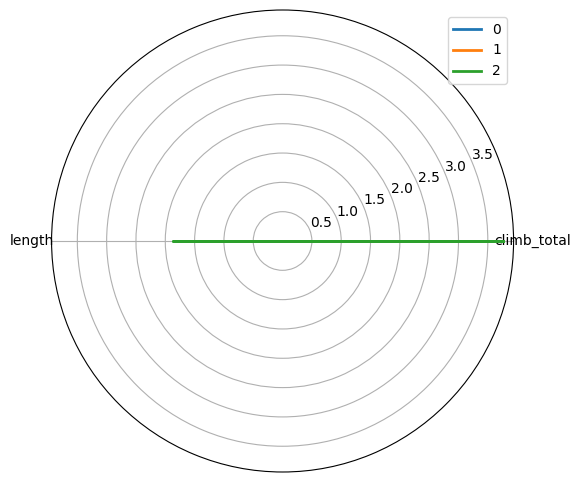

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = len(races_df.columns)
plt.figure(figsize=(6, 6))

for k in range(0, n_clusters):
    print(k)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    values = races_df[best_kmeans.labels_ == k].median().values.tolist()
    values += values[:1]
    angles += angles[:1]
    ax = plt.subplot(polar=True)
    plt.xticks(angles[:-1], races_df.columns)
    ax.plot(angles, values, linewidth=2)


plt.legend(labels=np.unique(best_kmeans.labels_))

plt.show()